In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [321]:
df=pd.read_csv(r"C:\Users\ABISHEK\Desktop\Jupyter\Red Wine Classification\winequality-red.csv")

In [322]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

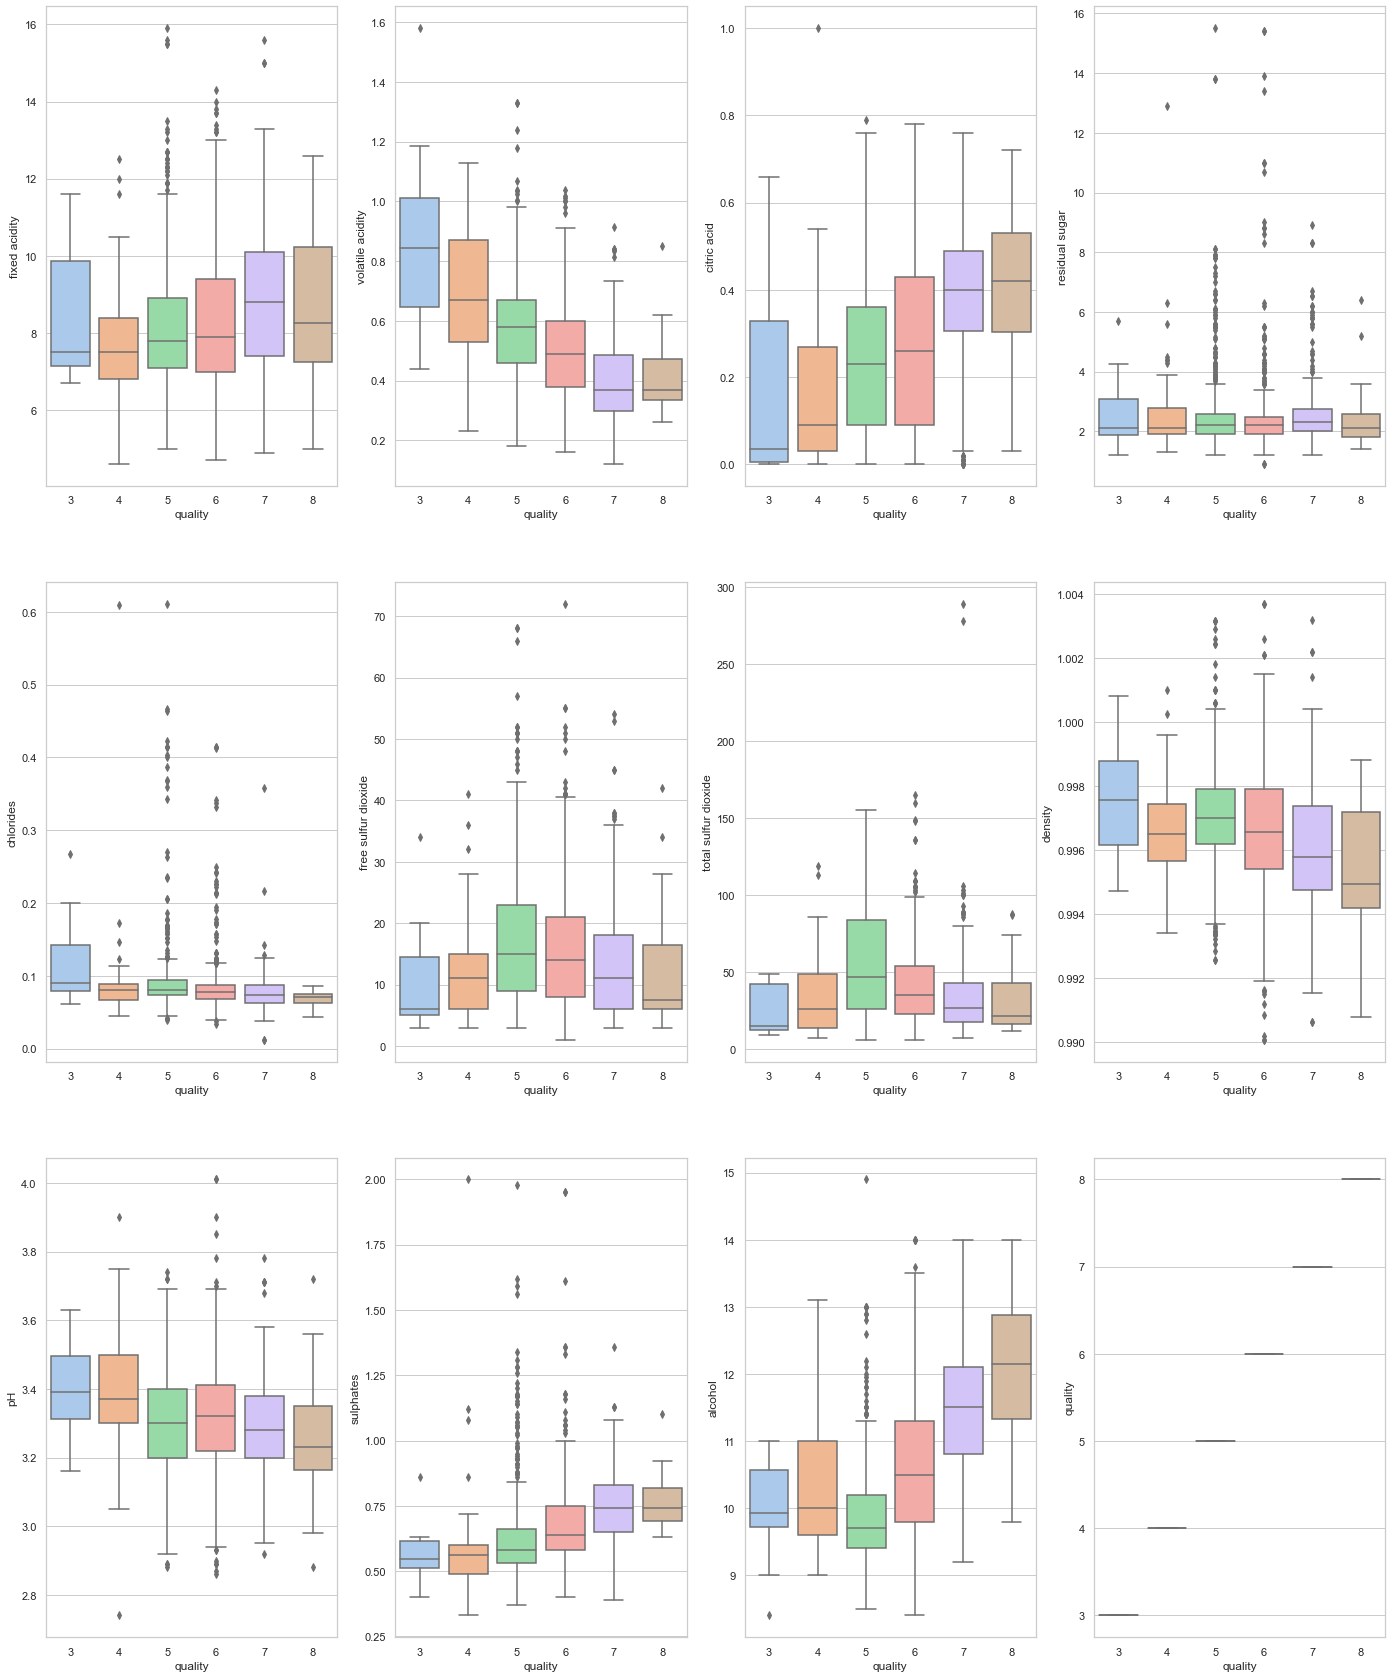

In [324]:
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.boxplot(df['quality'], df[columns[k]], ax = ax1[i][j], palette='pastel')
            k += 1
plt.show()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


C:\Users\ABISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

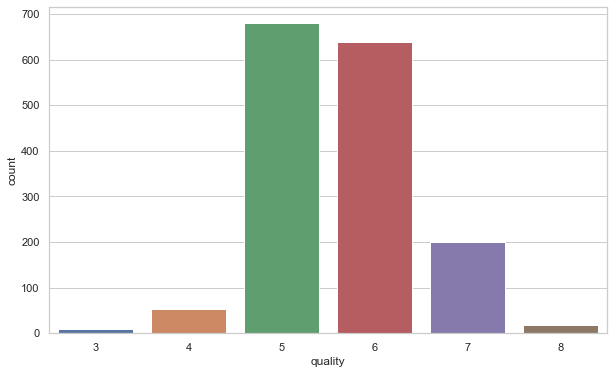

In [323]:
sns.set(style="whitegrid")
print(df['quality'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=df)

<AxesSubplot:>

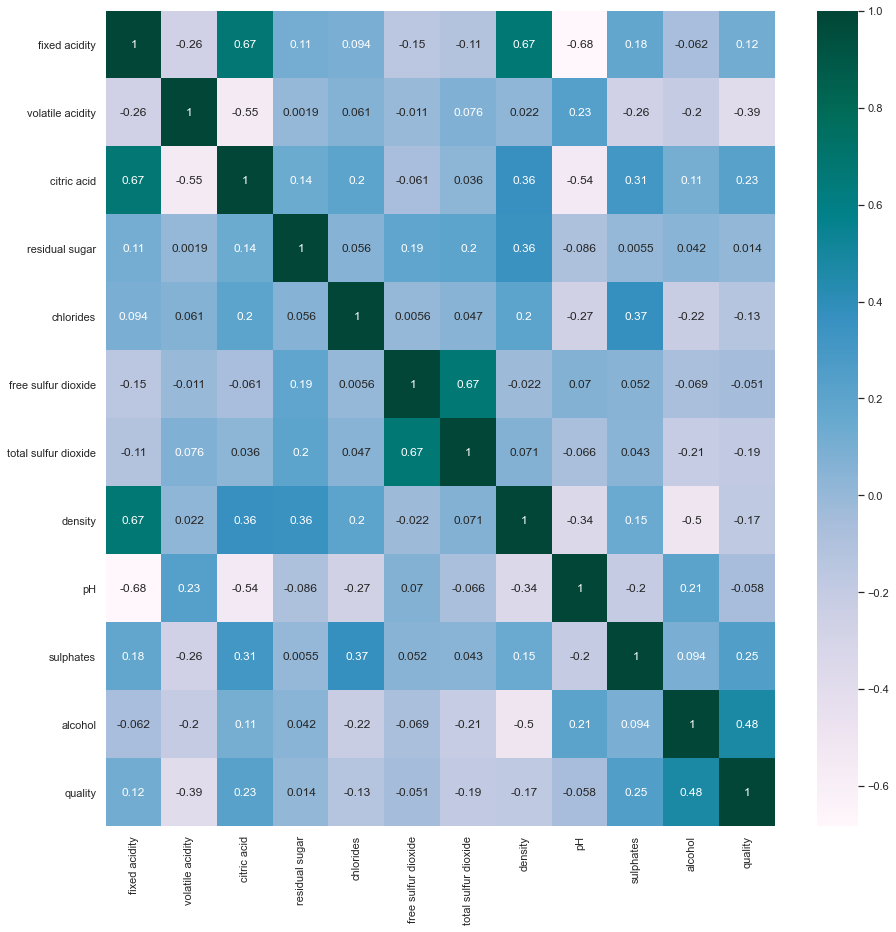

In [325]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cmap= 'PuBuGn')

In [275]:
df1=df.drop(df[['quality']],axis=1)
df1 = df1.stack().sample(frac=0.95).unstack()

In [276]:
df1.isnull().sum()

fixed acidity           76
volatile acidity        90
citric acid             77
residual sugar          74
chlorides               89
free sulfur dioxide     80
total sulfur dioxide    80
density                 72
pH                      70
sulphates               86
alcohol                 85
dtype: int64

In [277]:
df1['fixed acidity'].fillna((df1['fixed acidity'].mean()), inplace=True)
df1['volatile acidity'].fillna((df1['volatile acidity'].mean()), inplace=True)
df1['citric acid'].fillna((df1['citric acid'].mean()), inplace=True)
df1['residual sugar'].fillna((df1['residual sugar'].mean()), inplace=True)
df1['chlorides'].fillna((df1['chlorides'].mean()), inplace=True)
df1['free sulfur dioxide'].fillna((df1['free sulfur dioxide'].mean()), inplace=True)
df1['total sulfur dioxide'].fillna((df1['total sulfur dioxide'].mean()), inplace=True)
df1['density'].fillna((df1['density'].mean()), inplace=True)
df1['pH'].fillna((df1['pH'].mean()), inplace=True)
df1['sulphates'].fillna((df1['sulphates'].mean()), inplace=True)
df1['alcohol'].fillna((df1['alcohol'].mean()), inplace=True)

df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [278]:
def min_max_scaling(df):
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df1 = min_max_scaling(df1)
df1['quality']=df['quality']
df1['quality'] = [1 if x >= 7 else 0 for x in df1['quality']]

df1['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [279]:
x1=df1.drop(df1[['quality']],axis=1)
y1=df1[['quality']]

In [280]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=1)
model = LogisticRegression(solver='liblinear', random_state=0).fit(x1_train, y1_train)

C:\Users\ABISHEK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [281]:
model.score(x1_test,y1_test)*100

90.0

In [282]:
df2=df1.drop(df1[['quality']],axis=1)
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.000000,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.116564,0.153846
1,0.283186,0.520548,0.000000,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.190184,0.215385
2,0.283186,0.438356,0.050633,0.095890,0.133556,0.197183,0.169611,0.508811,0.449679,0.171779,0.215385
3,0.584071,0.109589,0.339718,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.128834,0.215385
4,0.247788,0.397260,0.000000,0.068493,0.106845,0.140845,0.098940,0.567548,0.449679,0.116564,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.101266,0.075342,0.130217,0.209895,0.134276,0.354626,0.559055,0.128834,0.323077
1595,0.115044,0.294521,0.126582,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.239264,0.430769
1596,0.150442,0.267123,0.164557,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.233129,0.400000
1597,0.115044,0.359589,0.151899,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.208589,0.276923


In [283]:
model.predict(df2.head(500))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [293]:
df2=df1
x = df2.iloc[:, :-1].values
y = df2[['quality']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [297]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

<ipython-input-297-630f0df3eac6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train, y_train)


KNeighborsClassifier()

In [298]:
y_pred = classifier.predict(df2.iloc[:,:-1].head(500))
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [299]:
classifier.score(x_train,y_train)*100

91.94683346364347

In [300]:
df2=df
x = df2.iloc[:, :-1].values
y = df2[['quality']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [302]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(df2.iloc[:, :-1].head(500))
y_pred1

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 8, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 6, 6, 5,
       5, 3, 5, 6, 5, 5, 4, 6, 7, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 4, 5, 5, 5, 7, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 4, 6, 5, 5, 5, 5, 4, 6, 6, 4, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6,
       8, 4, 7, 5, 5, 5, 6, 7, 7, 5, 5, 7, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 5, 4, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       5, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 4, 5, 5,
       6, 7, 4, 8, 6, 6, 7, 6, 6, 5, 5, 7, 6, 6, 8, 7, 6, 7, 5, 7, 5, 5,
       6, 7, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6,

In [307]:
from sklearn.linear_model import LinearRegression
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [308]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [311]:
# model.predict(X_train)
# model.predict(X_test)
model.predict(df.drop('quality', axis=1).head(500))

array([5.03349382, 5.13162588, 5.20688595, 5.72825006, 5.03349382,
       5.06869685, 5.13578042, 5.39906731, 5.36761373, 5.6151304 ,
       5.07951459, 5.6151304 , 5.15852767, 5.93035633, 5.14283896,
       5.17754981, 5.83947811, 5.37446009, 5.06716294, 5.46239564,
       5.58086459, 5.38884894, 5.75001752, 5.30183393, 5.5548895 ,
       5.45178425, 5.55503613, 5.75001752, 5.041233  , 5.38631425,
       5.15989567, 5.41993105, 5.19392386, 5.15975473, 5.28680666,
       5.24638889, 5.6001728 , 5.78239832, 4.46601111, 5.71901099,
       5.71901099, 5.13438589, 5.58425343, 6.01942253, 5.19445711,
       5.98846377, 4.59499026, 5.531482  , 5.42743176, 5.22096212,
       5.34612685, 5.45268827, 5.48593921, 5.31483655, 5.63574967,
       5.24420226, 5.73959325, 5.26990407, 5.32434451, 5.34911981,
       5.35259629, 4.88491011, 5.35683157, 5.09796673, 5.40273937,
       5.40273937, 5.32969311, 5.45818015, 6.05075191, 5.83902108,
       5.27259565, 4.89908205, 4.90129518, 4.9956416 , 5.67242

In [313]:
model.score(X_train,y_train)*100

36.36257097476548